## Grupo: 
 Mateus Ribeiro: 555225, Hubert Luz: 552798, Vinícius Lôbo: 554036. 
### Importando as bibliotecas

In [3]:
from matplotlib import pyplot as plt 
import numpy as np 
from scipy.io.wavfile import read, write
from numpy.fft import fft, ifft, fftfreq, fftshift
from IPython.display import Audio as play
from pathlib import Path 
from scipy.signal import firwin, lfilter


### Função auxiliar para plotagem de um vetor no domínio da frequência em dB

In [4]:
def spectrum(x_freq):
# 
# x_freq: vetor no domínio da frequência, complexo
#
    x_magnitude = np.abs(x_freq)
    # Normalização para o valor máximo ser 0dB
    x_magnitude /= np.max(x_magnitude)
    return 20*np.log10(x_magnitude)

### 1. Lendo o arquivo .wav para obter o sinal x[n] em forma de vetor

In [5]:
data_path=Path('../data')
wav_files = list(data_path.glob('*.wav'))

sample_rate_1, signal_1 = read(data_path/'01.wav')
sample_rate_2, signal_2 = read(data_path/'02.wav')

print(f"Sample_Rate_1: {sample_rate_1}")
print(f"Sample_Rate_2: {sample_rate_2}")
print(f"Signal1 : {signal_1}")
print(f"Signal 2: {signal_2}")

Sample_Rate_1: 44100
Sample_Rate_2: 22050
Signal1 : [ 107   79    9 ...  -55 -188 -160]
Signal 2: [-2685 -1229  1533 ...  -449   -86   311]


In [6]:
play(signal_1, rate = sample_rate_1)

In [7]:
play(signal_2, rate = sample_rate_2)

### 2. Plotando o gráfico de x[n] no tempo e de seu espectro de frequência

In [8]:
"""
Primeiro vamos pegar o numero de amostras de cada sinal para que possamos calcular o tempo total do sinal, 
isso é feito simplesmente dividindo o número de amostras pela frequência, em seguida criamos um vetor de
tempo t que será usado para plotar o sinal no domínio do tempo
"""

N1 = len(signal_1)
N2 = len(signal_2)

T1 = N1/sample_rate_1
T2 = N2/sample_rate_2

t1 = np.linspace(0, T1, N1, endpoint=False)
t2 = np.linspace(0, T2, N2, endpoint=False)

"""
Em seguinda, para obtermos no domínio da frequência, basta aplicarmos a transformada de fourier nos sinais usando
a fft() e usar a fftfreq() para pegar o array de frequências que correspondem aos componentes da fft
"""
signal_1_f = fft(signal_1)
signal_2_f = fft(signal_2)
s1f = fftfreq(N1, 1 / sample_rate_1)
s2f = fftfreq(N2, 1 / sample_rate_2)


"""
Armazenando em listas para facilitar o plot
"""
signals = [signal_1, signal_2]
sample_rates = [sample_rate_1, sample_rate_2]
ts = [t1, t2]
ffts = [signal_1_f, signal_2_f]
fs = [s1f, s2f]
spectrums = list(map(spectrum, ffts))

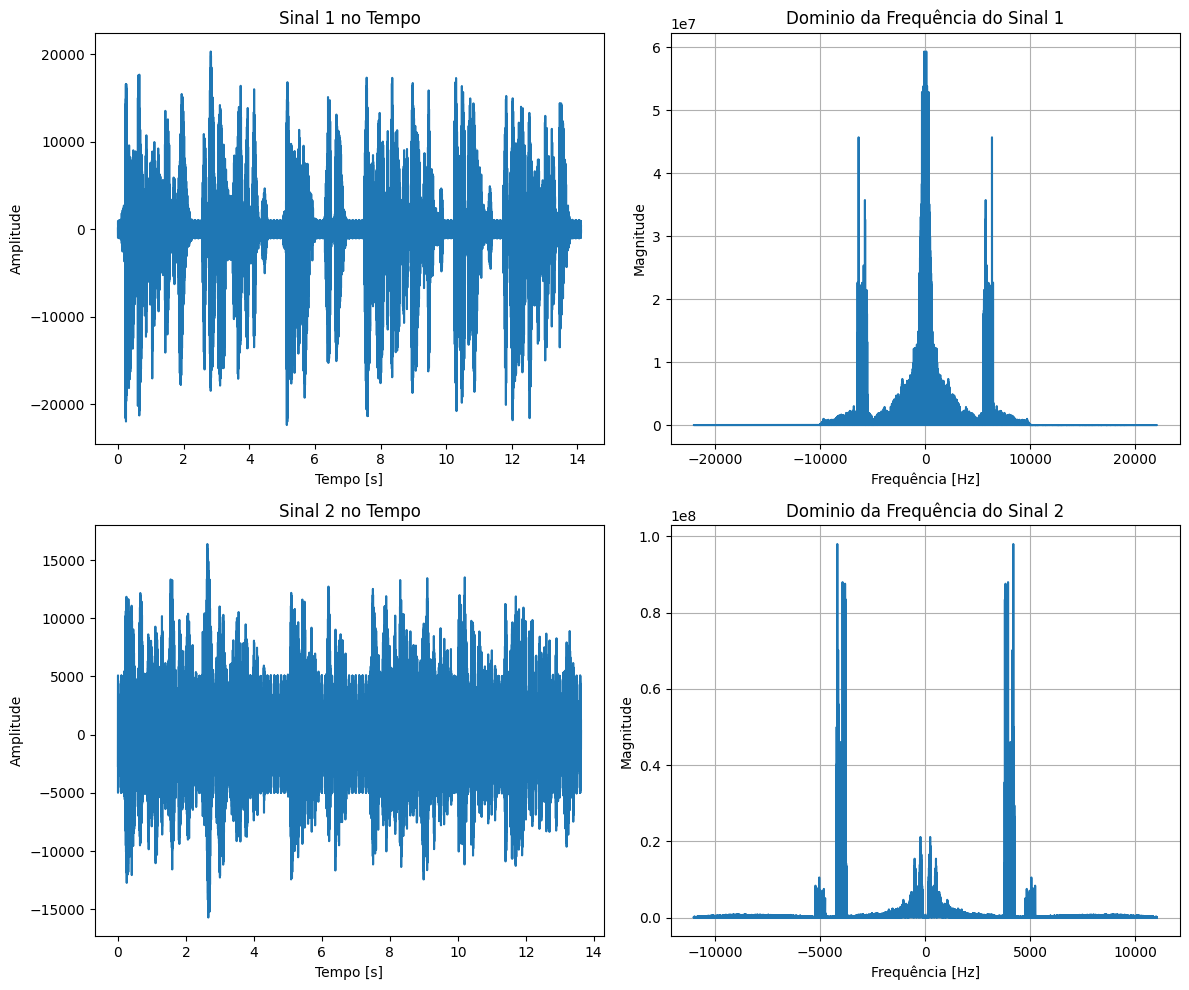

In [9]:
plt.figure(figsize=(12, 10))

for i in range(len(signals)):
    # Sinal no tempo
    plt.subplot(len(signals), 2, 2*i + 1)
    plt.plot(ts[i], signals[i])
    plt.title(f'Sinal {i+1} no Tempo')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Amplitude')
    
    #frequência
    plt.subplot(len(signals), 2, 2*i + 2)
    plt.plot(fs[i], np.abs(ffts[i]))
    plt.title(f'Dominio da Frequência do Sinal {i+1}')
    plt.xlabel('Frequência [Hz]')
    plt.ylabel('Magnitude')
    plt.grid()

plt.tight_layout()
plt.show()

#### Plot dos espectros


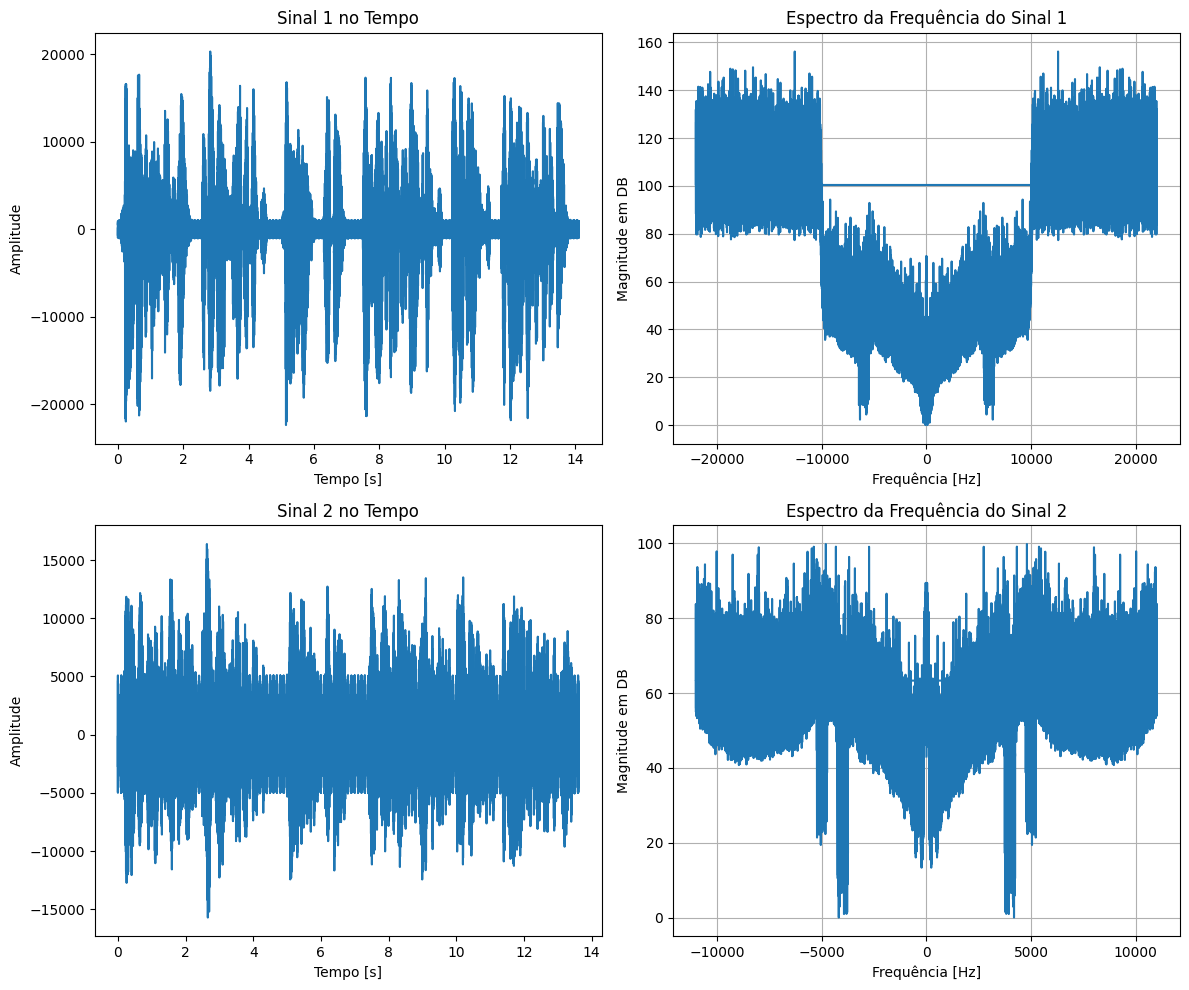

In [10]:
plt.figure(figsize=(12, 10))

for i in range(len(signals)):
    # Sinal no tempo
    plt.subplot(len(signals), 2, 2*i + 1)
    plt.plot(ts[i], signals[i])
    plt.title(f'Sinal {i+1} no Tempo')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Amplitude')
    
    #frequência
    plt.subplot(len(signals), 2, 2*i + 2)
    plt.plot(fs[i], np.abs(spectrums[i]))
    plt.title(f'Espectro da Frequência do Sinal {i+1}')
    plt.xlabel('Frequência [Hz]')
    plt.ylabel('Magnitude em DB')
    plt.grid()

plt.tight_layout()
plt.show()

### Avaliando o espectro do sinal:



### Implementando o filtro h[n] com $\omega_c$ e $L$

In [11]:
def low_pass_filter(signal, wc, sample_rate, L):
    # Cria o filtro FIR com uma janela de Hamming
    coefs = firwin(L, wc, window='hamming', fs=sample_rate)
    # Aplica o filtro ao sinal
    filtered_signal = lfilter(coefs, 1.0, signal)
    return filtered_signal

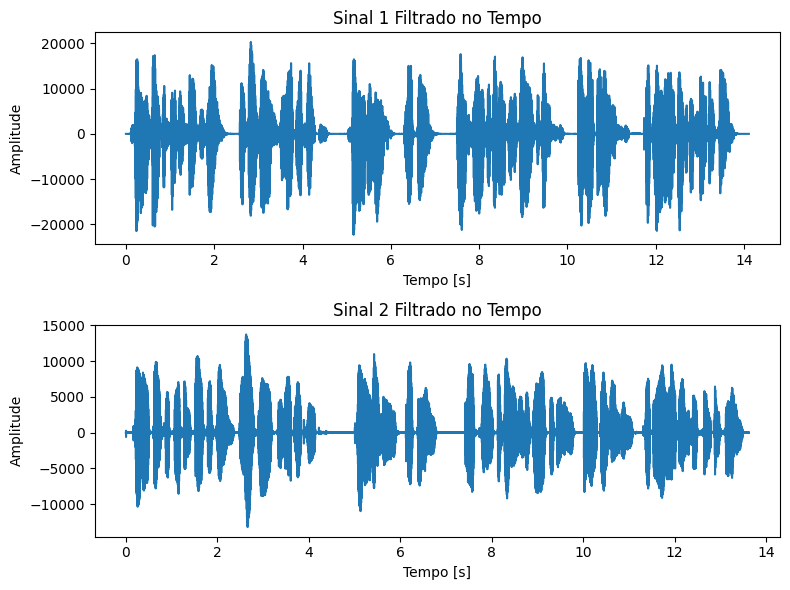

In [12]:
wc1 = 4000
wc2 = 3000
L1 = 100
L2 = 100
filtered_signal_1 = low_pass_filter(signal_1, wc1, sample_rate_1, L1)
filtered_signal_2 = low_pass_filter(signal_2, wc2, sample_rate_2, L2)

filtered_signals = [filtered_signal_1, filtered_signal_2]
# Plotando os sinais filtrados
plt.figure(figsize=(8, 6))
for i in range(len(filtered_signals)):
    plt.subplot(2, 1, i+1)
    plt.plot(ts[i], filtered_signals[i])
    plt.title(f'Sinal {i+1} Filtrado no Tempo')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

display(play(filtered_signal_1, rate=sample_rate_1))
display(play(filtered_signal_2, rate=sample_rate_2))

## Implementando um Filtro utilizando Transformada de Fourier


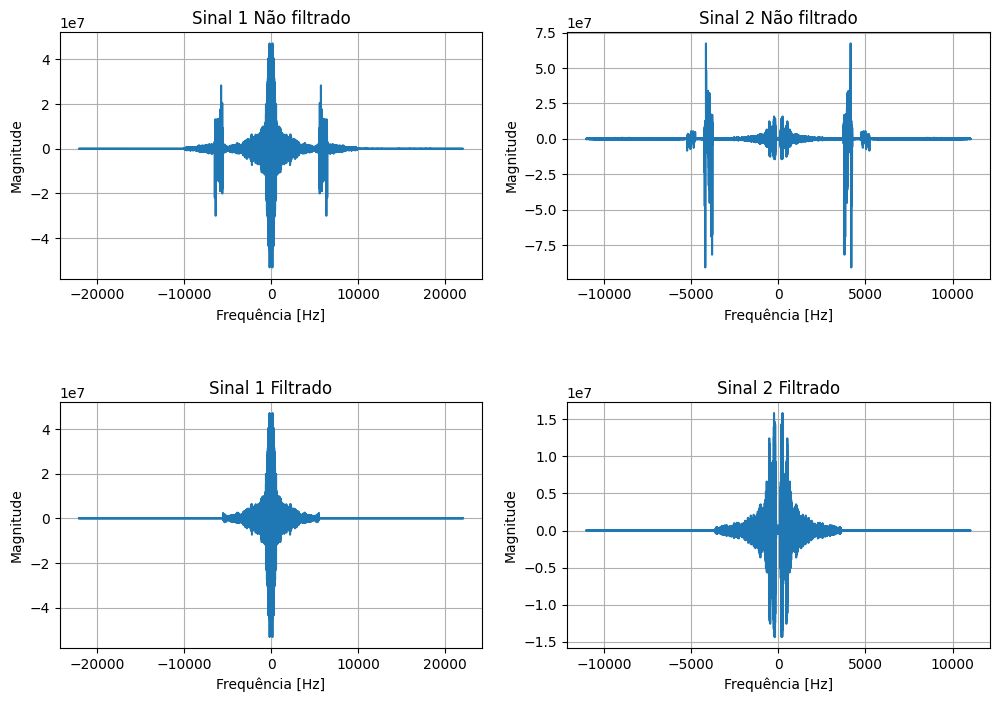

In [ ]:
"""
    Primeiro, vamos criar máscaras de tal forma atenuar o ruído de alta frequência, sendo assim, vamos estar criando um filtro Passa-Baixa:
    Ao analisarmos o espectro do sinal 1, vemos que o ruído surge próximo aos 6000Hz, sendo assim, coloquei a frequencia de corte fc = 5500hz
    como podemos ver no gráfico abaixo, não há um salto na magnitude devido ao ruído, o que mostra que o ruído foi atenuado
    De forma semelhante, o ruído no sinal 2 se mostra presente a partir dos 4000Hz, sendo assim, ajustando a frequencia de corte fc = 3600Hz,
    podemos ver que a magnitude apresentada pelo ruído se atenua, mostrando que o filtro está funcionando corretamente.
"""

mask_1 = np.abs(fs[0]) <= 5500
mask_2 = np.abs(fs[1]) <= 3600

FT_Filtred_1 = signal_1_f*mask_1
FT_Filtred_2 = signal_2_f*mask_2

Comparison_1= [signal_1_f, FT_Filtred_1]
Comparison_2= [signal_2_f, FT_Filtred_2]

plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.5)
for i in range(len(Comparison_1)):
    #comparison 1
    plt.subplot(2,2,2*i +1)
    plt.plot(fs[0],Comparison_1[i])
    plt.xlabel("Frequência [Hz]")
    plt.title("Sinal 1 Não filtrado" if i==0 else "Sinal 1 Filtrado")
    plt.ylabel("Magnitude")
    plt.grid()

    #Comparison 2

    plt.subplot(2,2,2*i+2)
    plt.plot(fs[1],Comparison_2[i])
    plt.xlabel("Frequência [Hz]")
    plt.title("Sinal 2 Não filtrado" if i==0 else "Sinal 2 Filtrado")
    plt.ylabel("Magnitude")
    plt.grid()

plt.show()

Filtered_signal_1 = ifft(FT_Filtred_1)  #Aplicando a Transformação inversa de fourier para podermos amostrar como um áudio e assim dar display
filtered_signal_2 = ifft(FT_Filtred_2)  #Aplicando a Transformação inversa de fourier para podermos amostrar como um áudio e assim dar display

display(play(Filtered_signal_1, rate=sample_rate_1))
display(play(filtered_signal_2, rate=sample_rate_2))


